In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import pickle

from scipy.optimize import fsolve

In [72]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

In [3]:
with open('params00.pickle', 'rb') as f:
    param_dict = pickle.load(f)
    
θ = param_dict['θ']
α = param_dict['α']
γ = param_dict['γ']
μ = param_dict['μ']
c = param_dict['c']
Δ = param_dict['Δ']

In [37]:
def Unum(ξ, μ, α, γ, θ, Δ, c):
    return (1.0/2.0)*(1 - np.exp(-Δ))*np.exp(-ξ)*(lambda input: np.heaviside(input,0.5))(ξ)/(μ*c + 1) + ((1.0/2.0)*(-np.exp(Δ)/(μ*c - 1) + 1.0/(μ*c - 1))*np.exp(ξ) + (( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2)*np.exp(Δ/(μ*c)) - ( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1.0/2.0*μ*c + θ*(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1) + (1.0/2.0)*(μ*c - 1)*np.exp(-Δ) + 1.0/2.0)*np.exp(ξ/(μ*c))/(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1))*(lambda input: np.heaviside(input,0.5))(-Δ - ξ) + ((θ + (-( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1.0/2.0*μ*c + ((1.0/2.0)*μ*c - 1.0/2.0)*np.exp(-Δ) + 1.0/2.0)/(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1))*np.exp(ξ/(μ*c)) + 1 - 1.0/2.0*np.exp(-Δ)*np.exp(-ξ)/(μ*c + 1) + (1.0/2.0)*np.exp(ξ)/(μ*c - 1))*(lambda input: np.heaviside(input,0.5))(-ξ)*(lambda input: np.heaviside(input,0.5))(Δ + ξ)

def Anum(ξ, μ, α, γ, θ, Δ, c):
    return γ*(1 - np.exp(ξ/(α*c)))*(lambda input: np.heaviside(input,0.5))(-ξ)*(lambda input: np.heaviside(input,0.5))(Δ + ξ) + γ*(np.exp(Δ/(α*c)) - 1)*np.exp(ξ/(α*c))*(lambda input: np.heaviside(input,0.5))(-Δ - ξ)

def J(ξ, μ, α, γ, θ, Δ, c):
    return Unum(ξ, μ, α, γ, θ, Δ, c) - Anum(ξ, μ, α, γ, θ, Δ, c) - θ

def Jdiff(ξ, μ, α, γ, θ, Δ, c):
    return -1.0/2.0*(1 - np.exp(-Δ))*np.exp(-ξ)*(lambda input: np.heaviside(input,0.5))(ξ)/(μ*c + 1) + ((-1.0/2.0*np.exp(Δ)/(μ*c - 1) + (1.0/2.0)/(μ*c - 1))*np.exp(ξ) + (( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2)*np.exp(Δ/(μ*c)) - ( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1.0/2.0*μ*c + θ*(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1) + (1.0/2.0)*(μ*c - 1)*np.exp(-Δ) + 1.0/2.0)*np.exp(ξ/(μ*c))/(μ*c*(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1)) - γ*(np.exp(Δ/(α*c)) - 1)*np.exp(ξ/(α*c))/(α*c))*(lambda input: np.heaviside(input,0.5))(-Δ - ξ) + ((1.0/2.0)*np.exp(-Δ)*np.exp(-ξ)/(μ*c + 1) + (1.0/2.0)*np.exp(ξ)/(μ*c - 1) + (θ + (-( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1.0/2.0*μ*c + ((1.0/2.0)*μ*c - 1.0/2.0)*np.exp(-Δ) + 1.0/2.0)/(( lambda base, exponent: base**exponent )(μ, 2)*( lambda base, exponent: base**exponent )(c, 2) - 1))*np.exp(ξ/(μ*c))/(μ*c) + γ*np.exp(ξ/(α*c))/(α*c))*(lambda input: np.heaviside(input,0.5))(-ξ)*(lambda input: np.heaviside(input,0.5))(Δ + ξ)


In [61]:
ζ = lambda x: np.exp(-(x)**2)
ϵ = 0.05

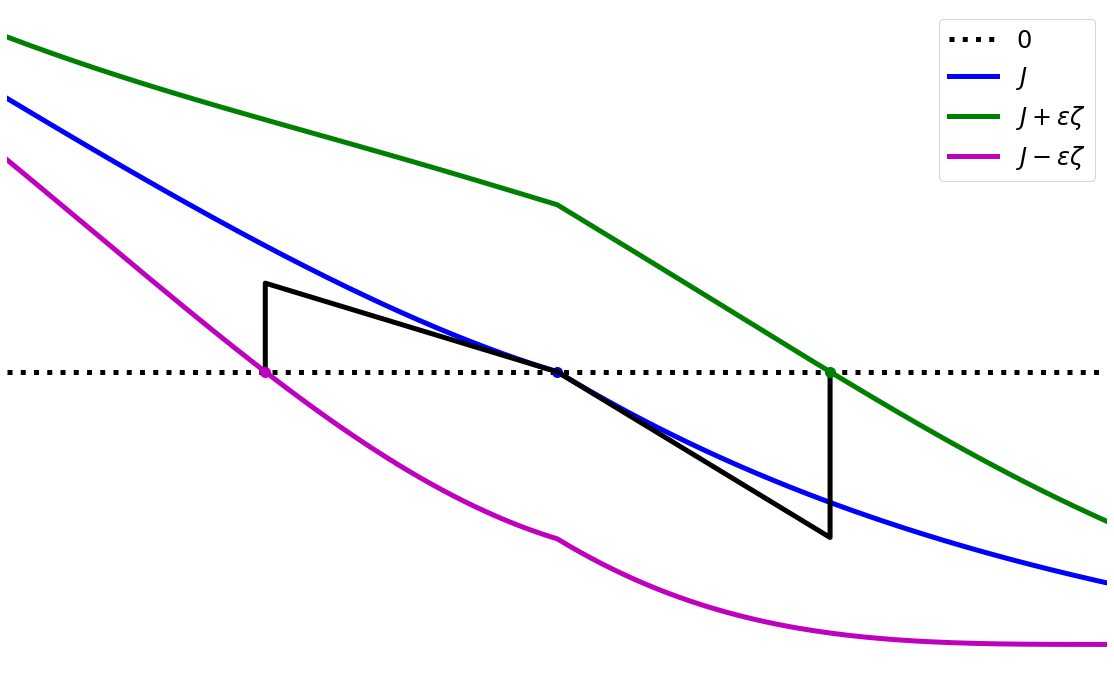

In [90]:
x0 = 0

xs = np.linspace(-1, 1, 201)

xs_right = xs[xs >= x0]
xs_left = xs[xs <= x0]


pertub_plus = lambda x: J(x, **param_dict)+ϵ*ζ(x)
xi_plus = fsolve(pertub_plus, x0=0)
slope_plus = Jdiff(0+1e-10, **param_dict)

pertub_minus = lambda x: J(x, **param_dict)-ϵ*ζ(x)
xi_minus = fsolve(pertub_minus, x0=0)
slope_minus = Jdiff(0-1e-10, **param_dict)

fig = plt.figure(figsize=(16, 10))

plt.plot(xs, 0*xs, 'k:', label='$0$', linewidth=5)


plt.plot(xs, J(xs, **param_dict), 'b-', label='$J$', linewidth=5)
plt.plot(0, 0, 'bo', markersize=10)

plt.plot([0, xi_plus, xi_plus], [0, slope_plus*(xi_plus), 0], 'k-', linewidth=5)
plt.plot(xs, pertub_plus(xs), 'g-', label='$J + \epsilon \zeta$', linewidth=5)
plt.plot(xi_plus, 0, 'go', markersize=10)

plt.plot([0, xi_minus, xi_minus], [0, slope_minus*(xi_minus), 0], 'k-', linewidth=5)
plt.plot(xs, pertub_minus(xs), 'm-', label='$J - \epsilon \zeta$', linewidth=5)
plt.plot(xi_minus, 0, 'mo', markersize=10)

plt.legend()
plt.axis('off')
plt.xlim(xs[0], xs[-1])
plt.tight_layout()
# plt.savefig('heaviside_linearization.png')
plt.show()

In [59]:
xi_plus

array([0.78201037])

In [ ]:
plt.plot()

In [14]:
Δ

32.15183309100653

In [23]:
- 1/(2*θ*(1+μ*c) - 1)

65.72368421047946

# Toy Model

$$H( g(\xi) + \epsilon h(\xi))$$